In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
engine.execute('select * from measurement limit 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [11]:
inspector = inspect(engine)
columns_m = inspector.get_columns('measurement')
columns_s = inspector.get_columns('station')

for c in columns_m: 
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
session.query(Measurement.date, Measurement.prcp).filter(Measurement.prcp == None).limit(5).all()

[('2010-01-06', None),
 ('2010-01-30', None),
 ('2010-02-03', None),
 ('2010-02-19', None),
 ('2010-03-11', None)]

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).limit(5).all()

# Perform a query to retrieve the data and precipitation scores
data_prcp = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc())\
    .filter(Measurement.date > '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data_prcp, columns=['Date', 'Precipitation'])
df.dropna(axis=0, how='any', inplace= True)
df = df.set_index('Date')

# Sort the dataframe by date
df.sort_values(by='Date', ascending=True, inplace=True)

df.head(5)



,Precipitation
Date,
2016-08-24,1.45
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.15
2016-08-24,1.22


In [14]:
data_prcp[:5]

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0)]

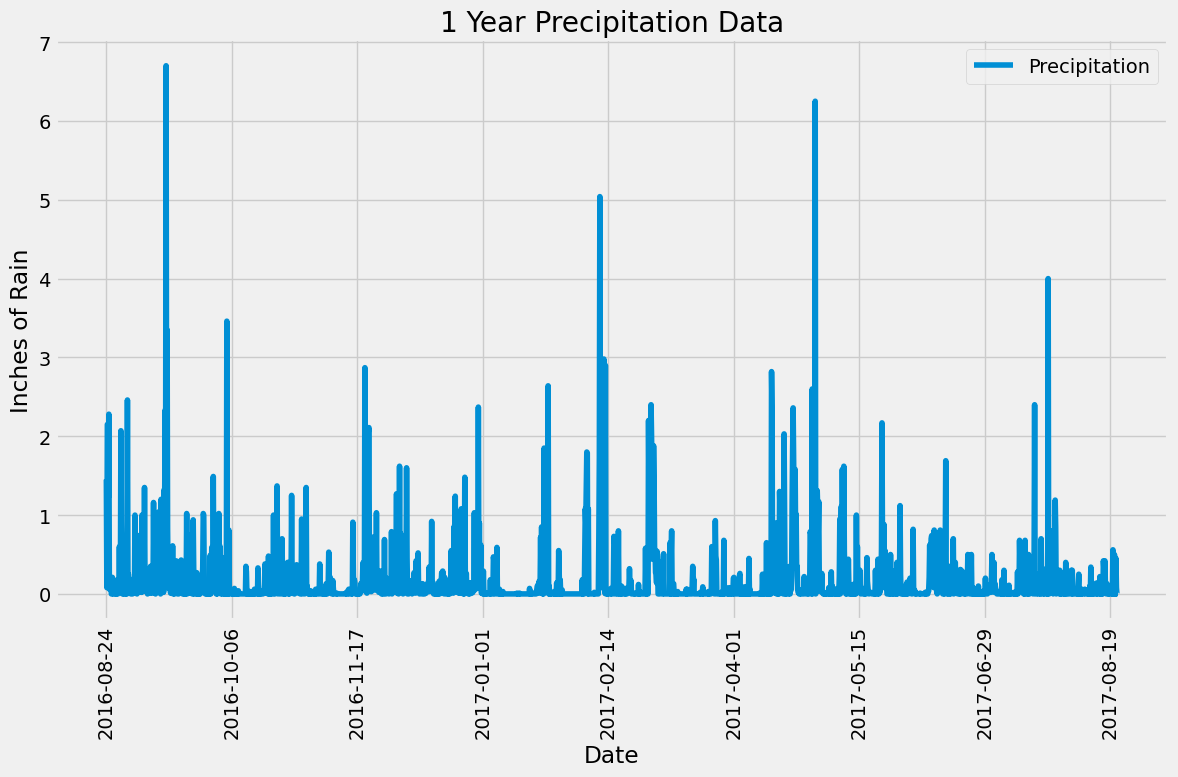

<Figure size 640x480 with 0 Axes>

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(y='Precipitation', title='1 Year Precipitation Data', rot = 90, figsize=(12,8))
plt.ylabel('Inches of Rain')
plt.xlabel('Date')
plt.tight_layout()

plt.show()

plt.savefig('barplot_precipitation')

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
engine.execute('select * from station limit 9').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [18]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.name).group_by(Station.name).count()
station_num = session.query(Station.name).group_by(Station.name).count()

print(f'There are {station_num} Stations in the dataset')

There are 9 Stations in the dataset


In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_max = session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc()).first()
print(f'Station ID {station_max[0]} is the most active station and recorded the highest number of observations.')

Station ID USC00519281 is the most active station and recorded the highest number of observations.


In [23]:
station_low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == station_max[0]).first()
print(f' The lowesst temperature recorded at station ID {station_max[0]} was {station_low_temp[0]} degree.')

station_hi_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == station_max[0]).first()
print(f' The highest temperature recorded at station ID {station_max[0]} was {station_hi_temp[0]} degrees.')

station_avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == station_max[0]).first()
print(f' The average temperature recorded at station ID {station_max[0]} was {station_avg_temp[0]} degrees.')


 The lowesst temperature recorded at station ID USC00519281 was 54.0 degree.
 The highest temperature recorded at station ID USC00519281 was 85.0 degrees.
 The average temperature recorded at station ID USC00519281 was 71.66378066378067 degrees.


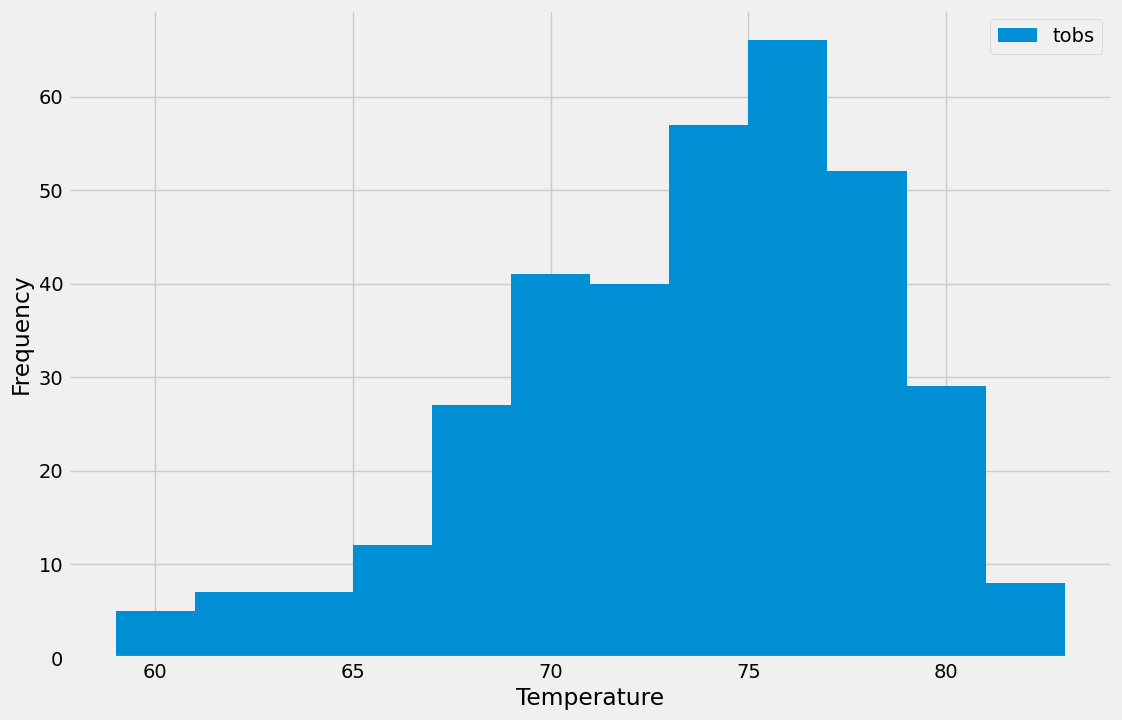

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_12months = session.query(Measurement.station, Measurement.tobs)\
    .filter(Measurement.station == station_max[0])\
    .filter(Measurement.date > '2016-08-23')

station_hist_df = pd.read_sql(station_12months.statement, station_12months.session.bind)

station_hist_df.plot.hist(bins=12, figsize=(12,8))
plt.xlabel('Temperature')
plt.savefig('histogram_temperatures')

# Close session

In [25]:
# Close Session
session.close()